In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
import os
import cv2

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [128]:
def and_ensemble_fnc(models_output_list):
  output = (models_output_list[0] * 0) + 1
  for model_output in models_output_list:
    output *= model_output
  return output

In [129]:
def majority_voting_ensemble_fnc(models_output_list):
  total_models = len(models_output_list)

  output = np.zeros((*models_output_list[0].shape))

  for model_output in models_output_list:
    model_output = (model_output>0.5).astype(np.int32)
    output += model_output
  
  output = ( output > (total_models//2) ).astype(np.int32)
  return output

In [130]:
from keras.models import load_model

In [5]:
def preprocess_image(image_path):
  # load image
  image = cv2.imread(image_path)

  # convert to array
  blob = cv2.dnn.blobFromImage(image, 1.0/255, (320, 320), (0, 0, 0), swapRB=True, crop=False)

  return image,blob

In [6]:
def load_saved_model(model_path):
  model = model_path
  
  # load model
  model = load_model(model, compile=False)
  
  return model

In [7]:
def get_mask(d1):
  pred = np.array(d1[:,0,:,:])[0]
  
  # normalize
  ma = np.max(pred)
  mi = np.min(pred)
  pred = (pred-mi)/(ma-mi)

  pred = pred.squeeze()

  pred = (pred*255).astype(np.uint8)

  mask = cv2.resize(pred, image.shape[1::-1], interpolation=cv2.INTER_CUBIC)
  return mask

In [116]:
img_dir_or_file = '/content/test_image/6381157366_005.png'

def get_output(image,mask):
  image = plt.imread(image,0)
  image = np.array(tf.image.resize(image,(600,599)))
  image/=255.0
  return image,image*mask.reshape((600,599,1))

def model_u2net(flag):
  model = '/content/drive/MyDrive/temp_project/u2net_keras.h5'
  model = load_saved_model(model)
  
  images_name_list = []
  if flag==1:
    images_name_list.append(img_dir_or_file)
  
  else:
    images_name_list = os.listdir(img_dir_or_file)
    images_name_list = list(map(lambda x : os.path.join(img_dir_or_file,x),images_name_list ) )
  
  processed_images = []

  for image_path in images_name_list:
    _,processed_image = preprocess_image(image_path)
    processed_images.append(processed_image)
  
  processed_images = np.array(processed_images)
  processed_images = processed_images.reshape((len(images_name_list), 3, 320, 320))
  d1,d2,d3,d4,d5,d6,d7 = model.predict(processed_images)

  masks = []
  for idx,pred in enumerate(d1):
    pred = pred.reshape((1,1,320,320))
    mask = get_mask(pred)
    mask = (mask > 0.4).astype(np.int32)
    masks.append(mask)
  return images_name_list,masks
  

def model_u2netp(flag):
  model = '/content/drive/MyDrive/temp_project/u2netp_keras.h5'
  model = load_saved_model(model)
  
  images_name_list = []
  if flag==1:
    images_name_list.append(img_dir_or_file)
  
  else:
    images_name_list = os.listdir(img_dir_or_file)
    images_name_list = list(map(lambda x : os.path.join(img_dir_or_file,x),images_name_list ) )
  
  processed_images = []

  for image_path in images_name_list:
    _,processed_image = preprocess_image(image_path)
    processed_images.append(processed_image)
  
  processed_images = np.array(processed_images)
  processed_images = processed_images.reshape((len(images_name_list), 3, 320, 320))
  d1,d2,d3,d4,d5,d6,d7 = model.predict(processed_images)

  masks = []
  for idx,pred in enumerate(d1):
    pred = pred.reshape((1,1,320,320))
    mask = get_mask(pred)
    mask = (mask > 0.4).astype(np.int32)
    masks.append(mask)
  return images_name_list,masks

def model_squeeze_unet(flag):
  model = '/content/drive/MyDrive/temp_project/squeeze_unet.h5'
  model = load_saved_model(model)

  images_name_list = []
  if flag==1:
    images_name_list.append(img_dir_or_file)
  else:
    images_name_list.append(os.listdir(img_dir_or_file))
  
  images = []
  

def model_unet(flag):
  model = '/content/drive/MyDrive/temp_project/unet.h5'
  model = load_saved_model(model)

  images_name_list = []
  if flag==1:
    images_name_list.append(img_dir_or_file)
  else:
    images_name_list.append(os.listdir(img_dir_or_file))
  
  images = []


In [114]:
image_name_list,mask = model_u2net(1)

In [118]:
image,out = get_output(image_name_list[0],mask[0])

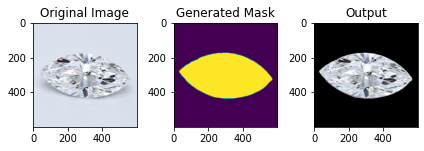

In [138]:
plt.subplot(1,3,1)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(1,3,2)
plt.imshow(mask[0].reshape((600,599)))
plt.title('Generated Mask')
plt.subplot(1,3,3)
plt.imshow(out)
plt.title('Output')
plt.tight_layout()
plt.savefig('plot.jpeg',dpi=600)

In [125]:
image_name_list_p,mask_p = model_u2netp(1)
image_p,out_p = get_output(image_name_list[0],mask[0])

In [131]:
final = and_ensemble_fnc([mask[0],mask_p[0]])

In [132]:
final_image,final_out = get_output(image_name_list[0],final)

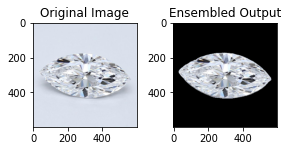

In [137]:
plt.subplot(1,3,1)
plt.imshow(final_image)
plt.title('Original Image')
plt.subplot(1,3,2)
plt.imshow(final_out)
plt.title('Ensembled Output')
plt.tight_layout()
plt.savefig('plot.jpeg',dpi=600)